In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import optuna
from sklearn.model_selection import cross_val_score

# Data
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

#Preproccesor and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline

# Evaluation & Tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [3]:
data = pd.read_excel('ptestost.xlsx')
df=data.copy()

In [4]:
df.sample(5)

Age  DM   TG  HT   HDL     AC  T
2153   55   1   87   0  43.0   92.0  0
2578   54   1  151   1  46.0  102.0  0
2191   75   1  317   1  32.0  112.0  0
1137   56   0   79   0  57.0   97.0  0
1121   70   0  128   0  39.0   92.0  0

In [5]:
print(f'Total number of records: {data.shape[0]}')
print(f'Total number of features: {data.shape[1]}')
     

Total number of records: 3397
Total number of features: 7


## Check Data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     3397 non-null   int64  
 1   DM      3397 non-null   int64  
 2   TG      3397 non-null   int64  
 3   HT      3397 non-null   int64  
 4   HDL     3397 non-null   float64
 5   AC      3397 non-null   float64
 6   T       3397 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 185.9 KB


### Here are the features:

### Age: Age of patients in years (considered within the range of 45-85 years).

### Triglycerides (TG): Integer numbers representing levels in mg/dl.

### Waist Circumference (WC): Waist circumference in centimeters (threshold commonly noted at 102cm in medical literature).

### HDL: High-Density Lipoprotein levels represented by integer numbers in mg/dl.

### Hypertension: Binary feature indicating presence (1) or absence (0) of hypertension.

### Diabetes: Binary feature indicating presence (1) or absence (0) of diabetes.

### The target variable, denoted as T, signifies Testosterone levels. According to medical literature, a deficiency is suggested when T<300 ng/dl.

## Check Missing values

In [7]:
df.isnull().sum()

Age    0
DM     0
TG     0
HT     0
HDL    0
AC     0
T      0
dtype: int64

## Check for Duplicate rows

In [8]:
df.duplicated().sum()

7

In [9]:
df[df.duplicated()]

Age  DM   TG  HT   HDL     AC  T
38     60   1   71   0  47.0   88.0  0
258    60   1  135   0  42.0   97.0  0
498    54   0  112   0  38.0   90.0  0
980    61   0  141   1  38.0  100.0  0
1460   46   0   43   0  61.0   69.0  0
2149   47   1   66   0  38.0   94.0  0
2954   56   1  217   1  40.0  106.0  1

## Check for Unique value count

In [10]:
df.nunique()

Age     41
DM       2
TG     406
HT       2
HDL     82
AC      81
T        2
dtype: int64

## Check Statistics of data

In [11]:
data.describe()

Age           DM           TG           HT          HDL  \
count  3397.000000  3397.000000  3397.000000  3397.000000  3397.000000   
mean     61.327348     0.388578   155.269650     0.511922    46.325493   
std      10.072821     0.487499    88.840249     0.499931    10.960146   
min      45.000000     0.000000    12.000000     0.000000    13.000000   
25%      53.000000     0.000000    97.000000     0.000000    39.000000   
50%      60.000000     0.000000   136.000000     1.000000    45.000000   
75%      69.000000     1.000000   183.000000     1.000000    52.000000   
max      85.000000     1.000000   980.000000     1.000000   116.000000   

                AC            T  
count  3397.000000  3397.000000  
mean     98.916515     0.193112  
std      10.629471     0.394798  
min      43.000000     0.000000  
25%      92.000000     0.000000  
50%      98.000000     0.000000  
75%     105.000000     0.000000  
max     198.000000     1.000000

## EDA - Univariate Analysis

In [12]:
unique_counts = data.nunique()
numerical = []
categorical = []
for feature in data.columns:
    if unique_counts[feature] == 2:
        categorical.append(feature)
    else:
        numerical.append(feature)
print(f'Categorical Features: {categorical}')
print(f'Numerical Features: {numerical}')
     

Categorical Features: ['DM', 'HT', 'T']
Numerical Features: ['Age', 'TG', 'HDL', 'AC']


In [13]:
#categorical_columns = df.select_dtypes(include=['object', 'category']).columns
#categorical_columns

In [14]:
#cat=data.select_dtypes(exclude='object')
#cat.head(3)

## Categorical Data

### Pie Chart

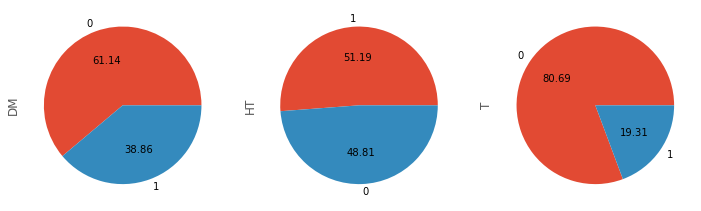

In [15]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1,3, figsize=(12, 6))

# pie chart for 'DM'
data['DM'].value_counts().plot(kind='pie', autopct='%.2f', ax=axs[0])

# pie chart for 'HT'
data['HT'].value_counts().plot(kind='pie', autopct='%.2f', ax=axs[1])

# pie chart for 'T'
data['T'].value_counts().plot(kind='pie', autopct='%.2f', ax=axs[2])

plt.show()
     

### Bar Graph

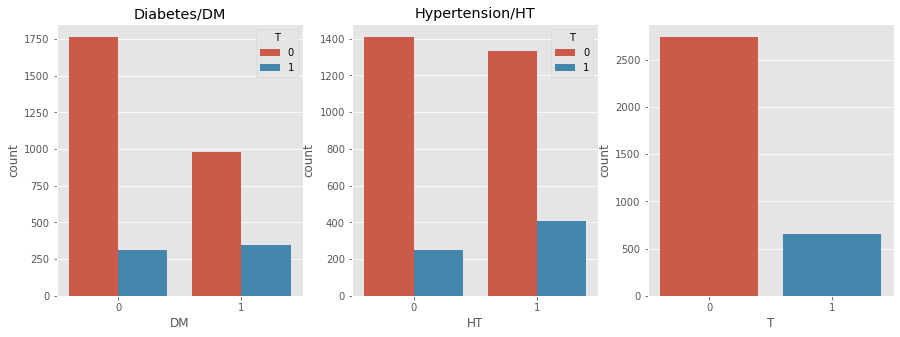

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='DM', data=data, hue='T', ax=axs[0])
axs[0].set_title('Diabetes/DM')

sns.countplot(x='HT', data=data, hue='T', ax=axs[1])
axs[1].set_title('Hypertension/HT')

sns.countplot(x='T', data=data, ax=axs[2])

plt.show()

## Numerical data

### Histogram with PDF

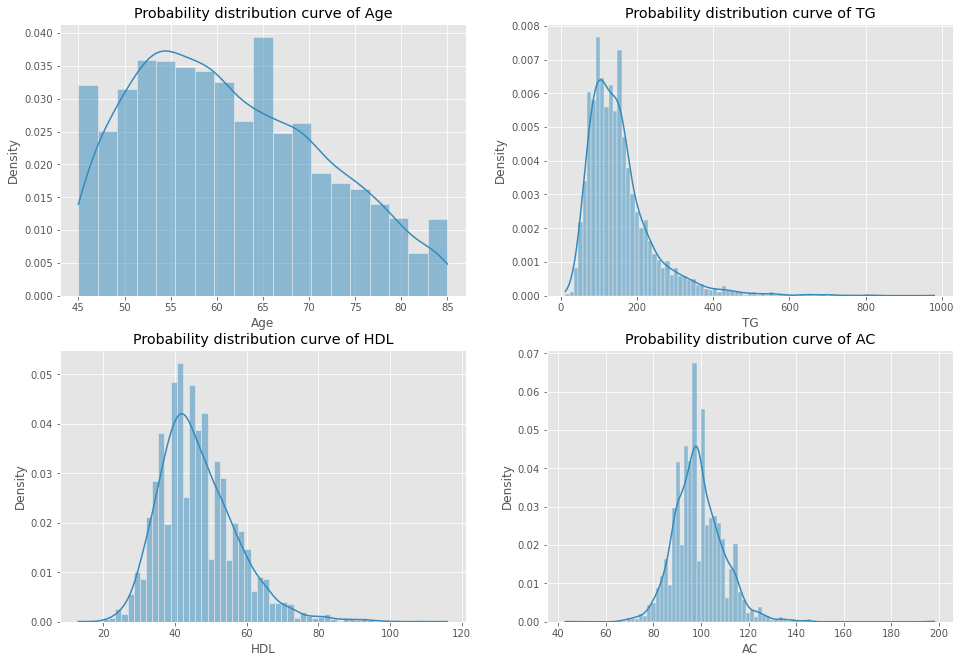

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(data['Age'],kde=True, stat="density", ax=axs[0][0])
axs[0][0].set_title('Probability distribution curve of Age')

sns.histplot(data['TG'],kde=True, stat="density", ax=axs[0][1])
axs[0][1].set_title('Probability distribution curve of TG')

sns.histplot(data['HDL'],kde=True, stat="density", ax=axs[1][0])
axs[1][0].set_title('Probability distribution curve of HDL')

sns.histplot(data['AC'],kde=True, stat="density", ax=axs[1][1])
axs[1][1].set_title('Probability distribution curve of AC')
plt.show()

### Box-Plot

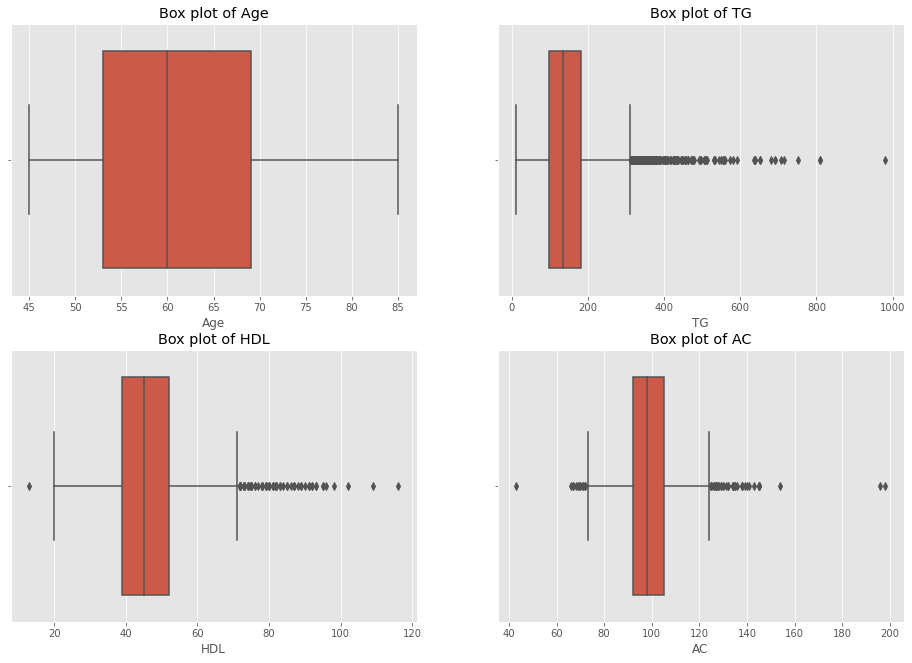

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 11))

sns.boxplot(data['Age'],orient = 'h', ax=axs[0][0])
axs[0][0].set_title('Box plot of Age')

sns.boxplot(data['TG'],orient = 'h', ax=axs[0][1])
axs[0][1].set_title('Box plot of TG')

sns.boxplot(data['HDL'],orient = 'h', ax=axs[1][0])
axs[1][0].set_title('Box plot of HDL')

sns.boxplot(data['AC'],orient = 'h', ax=axs[1][1])
axs[1][1].set_title('Box plot of AC')
plt.show()

In [19]:
stats = {}
for feature in numerical:
    stats[feature] = {'Mean' : round(data[feature].mean(),2),
                    'Median': round(data[feature].median(),2),
                    'Mode': round(data[feature].mode()[0],2),
                    'Standard deviation': round(data[feature].std(),2),
                    'Coefficient of skewness': round(data[feature].skew(),2)}
for key, value in stats.items():
    print(f"{key}: {value}")

Age: {'Mean': 61.33, 'Median': 60.0, 'Mode': 53, 'Standard deviation': 10.07, 'Coefficient of skewness': 0.39}
TG: {'Mean': 155.27, 'Median': 136.0, 'Mode': 154, 'Standard deviation': 88.84, 'Coefficient of skewness': 2.34}
HDL: {'Mean': 46.33, 'Median': 45.0, 'Mode': 41.0, 'Standard deviation': 10.96, 'Coefficient of skewness': 1.0}
AC: {'Mean': 98.92, 'Median': 98.0, 'Mode': 98.0, 'Standard deviation': 10.63, 'Coefficient of skewness': 0.9}


## EDA - Bivariate analysis

### Correlation

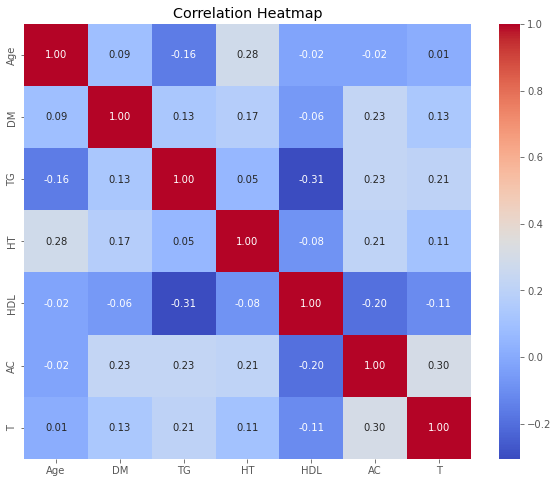

In [20]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Numerical v/s Numerical

### Scatter Plot

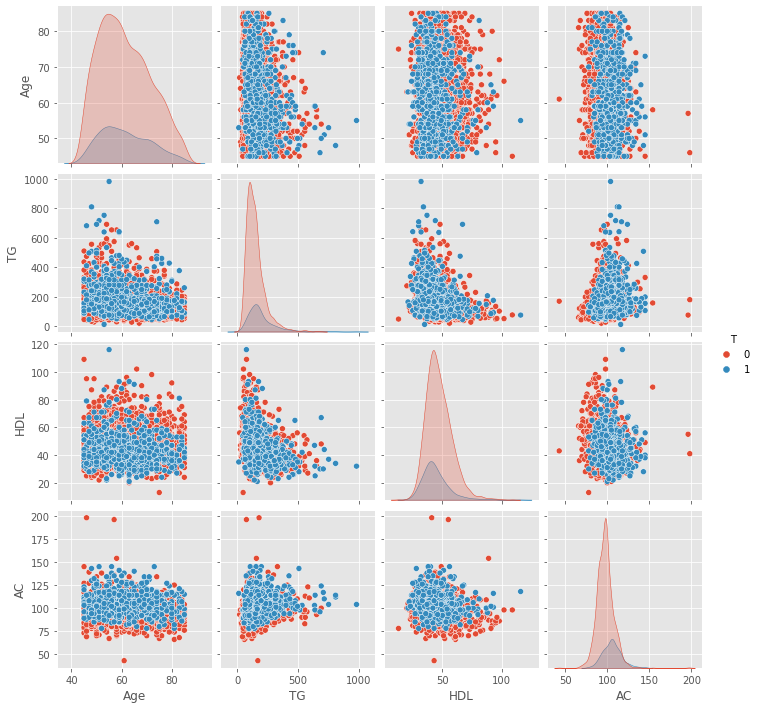

In [21]:
sns.pairplot(data[numerical+['T']], hue = 'T')

## Numerical v/s Categorical

### Bar Graph

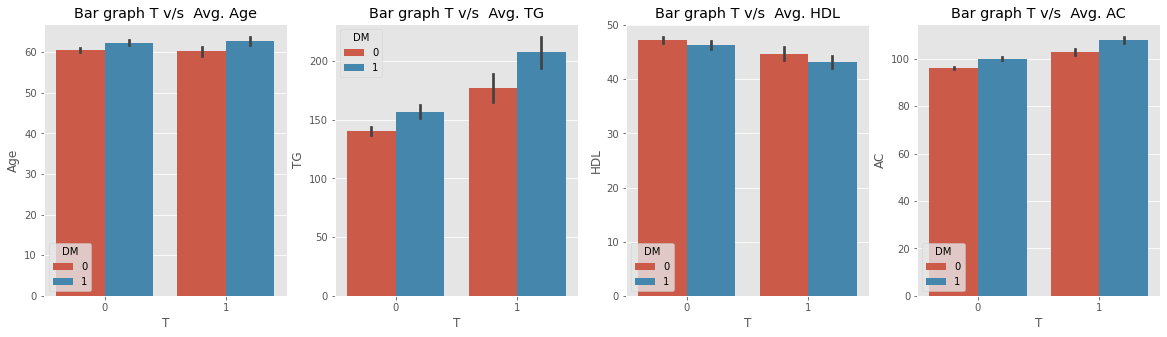

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.barplot(data=df, x = 'T', y = 'Age', hue = 'DM', ax = axs[0])
axs[0].set_title('Bar graph T v/s  Avg. Age')

sns.barplot(data=df, x = 'T', y = 'TG', hue = 'DM', ax = axs[1])
axs[1].set_title('Bar graph T v/s  Avg. TG')

sns.barplot(data=df, x = 'T', y = 'HDL', hue = 'DM', ax = axs[2])
axs[2].set_title('Bar graph T v/s  Avg. HDL')

sns.barplot(data=df, x = 'T', y = 'AC', hue = 'DM', ax = axs[3])
axs[3].set_title('Bar graph T v/s  Avg. AC')

plt.show()

### Box plot

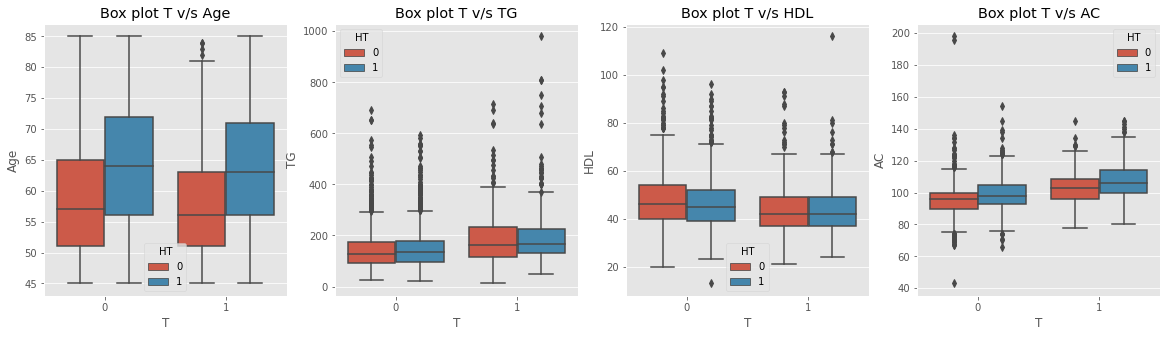

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(data=df, x = 'T', y = 'Age', hue = 'HT', ax = axs[0])
axs[0].set_title('Box plot T v/s Age')

sns.boxplot(data=df, x = 'T', y = 'TG', hue = 'HT', ax = axs[1])
axs[1].set_title('Box plot T v/s TG')

sns.boxplot(data=df, x = 'T', y = 'HDL', hue = 'HT', ax = axs[2])
axs[2].set_title('Box plot T v/s HDL')

sns.boxplot(data=df, x = 'T', y = 'AC', hue = 'HT', ax = axs[3])
axs[3].set_title('Box plot T v/s AC')

plt.show()

### Probability distribution Curves

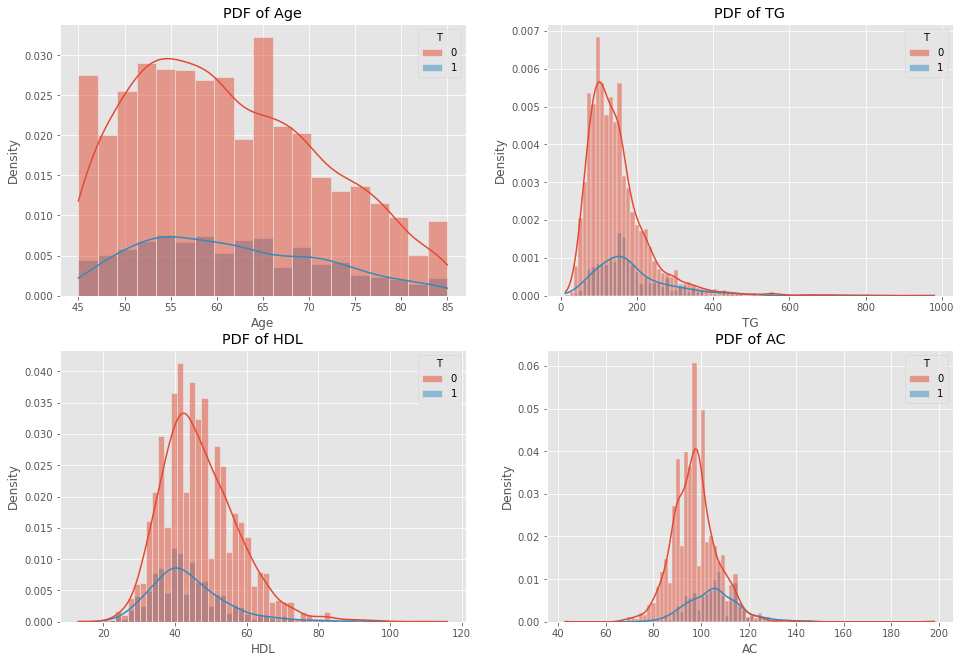

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(data = data, x = 'Age', kde = True, hue = 'T',stat = "density", ax=axs[0][0])
axs[0][0].set_title('PDF of Age')

sns.histplot(data = data, x = 'TG', kde = True, hue = 'T', stat = "density", ax=axs[0][1])
axs[0][1].set_title('PDF of TG')

sns.histplot(data = data, x = 'HDL', kde = True, hue = 'T', stat = "density", ax=axs[1][0])
axs[1][0].set_title('PDF of HDL')

sns.histplot(data = data, x = 'AC', kde = True, hue = 'T', stat = "density", ax=axs[1][1])
axs[1][1].set_title('PDF of AC')
plt.show()

## Categorical v/s Categorical

### Heatmap

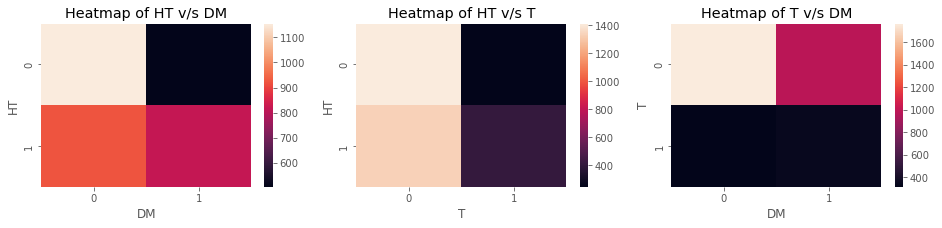

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(16,3))

sns.heatmap(pd.crosstab(data['HT'],data['DM']), ax = axs[0])
axs[0].set_title('Heatmap of HT v/s DM')

sns.heatmap(pd.crosstab(data['HT'],data['T']), ax = axs[1])
axs[1].set_title('Heatmap of HT v/s T')

sns.heatmap(pd.crosstab(data['T'],data['DM']), ax = axs[2])
axs[2].set_title('Heatmap of T v/s DM')

plt.show()

In [26]:
df.sample(1)

Age  DM   TG  HT   HDL     AC  T
335   68   0  178   1  42.0  104.0  0

In [27]:
x=data.iloc[:,0:-1]
x

Age  DM   TG  HT   HDL     AC
0      60   0  145   1  35.0  114.0
1      75   0   93   0  48.0   84.0
2      50   0  151   0  57.0   99.0
3      62   0  178   1  28.0  109.0
4      55   0  138   1  62.0   98.0
...   ...  ..  ...  ..   ...    ...
3392   67   1   87   1  43.0  108.0
3393   77   0   65   1  37.0  104.0
3394   74   1  707   1  30.0  117.0
3395   61   1  164   1  54.0   99.0
3396   46   1  178   0  34.0  114.0

[3397 rows x 6 columns]

In [28]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3392    1
3393    1
3394    1
3395    1
3396    1
Name: T, Length: 3397, dtype: int64

In [29]:
from imblearn.combine import SMOTETomek as stm
os = stm(random_state = 19)
x_new,y_new = os.fit_resample(x,y)

In [30]:
x_new

Age  DM   TG  HT        HDL          AC
0      60   0  145   1  35.000000  114.000000
1      75   0   93   0  48.000000   84.000000
2      50   0  151   0  57.000000   99.000000
3      62   0  178   1  28.000000  109.000000
4      55   0  138   1  62.000000   98.000000
...   ...  ..  ...  ..        ...         ...
5305   51   0  270   1  32.897755  104.772712
5306   54   0  181   0  37.504193   90.041929
5307   48   1  150   1  55.240882   95.124118
5308   60   0  171   0  43.658224   94.683553
5309   63   0  169   0  37.033953  107.915117

[5310 rows x 6 columns]

In [31]:
y_new

0       0
1       0
2       0
3       0
4       0
       ..
5305    1
5306    1
5307    1
5308    1
5309    1
Name: T, Length: 5310, dtype: int64

In [32]:
df = pd.concat([x_new, y_new], axis=1)
df

Age  DM   TG  HT        HDL          AC  T
0      60   0  145   1  35.000000  114.000000  0
1      75   0   93   0  48.000000   84.000000  0
2      50   0  151   0  57.000000   99.000000  0
3      62   0  178   1  28.000000  109.000000  0
4      55   0  138   1  62.000000   98.000000  0
...   ...  ..  ...  ..        ...         ... ..
5305   51   0  270   1  32.897755  104.772712  1
5306   54   0  181   0  37.504193   90.041929  1
5307   48   1  150   1  55.240882   95.124118  1
5308   60   0  171   0  43.658224   94.683553  1
5309   63   0  169   0  37.033953  107.915117  1

[5310 rows x 7 columns]

In [33]:

df.duplicated().sum()


11

In [34]:
df = df.drop_duplicates(ignore_index = True).round(1)

In [35]:
outlier_list = []
u = []
l = []
for feature in numerical:
    per25 = df[feature].quantile(0.25)
    per75 = df[feature].quantile(0.75)
    iqr = per75-per25
    upper = per75 + 1.5 * iqr
    lower = per25 - 1.5 * iqr
    noutlier = df[(df[feature] < lower) | (df[feature] > upper)].shape[0]
    nrows = df.shape[0]
    print(f'Total outlier percentage in {feature}: {noutlier/nrows*100:.2f}')

    outlier_list.append(noutlier)
    u.append(upper)
    l.append(lower)

non_outlier_list = [nrows-x for x in outlier_list]

Total outlier percentage in Age: 0.00
Total outlier percentage in TG: 6.47
Total outlier percentage in HDL: 2.68
Total outlier percentage in AC: 1.59


<Figure size 720x432 with 0 Axes>

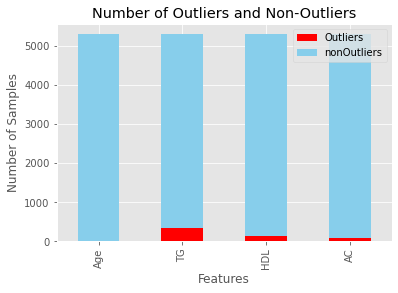

In [36]:

plot_data = pd.DataFrame({'Outliers': outlier_list, 'nonOutliers': non_outlier_list}, index = numerical)
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.xlabel('Features')
plt.ylabel('Number of Samples')
plt.title('Number of Outliers and Non-Outliers')
plt.show()

In [37]:
for feature in numerical:
    per25 = df[feature].quantile(0.25)
    per75 = df[feature].quantile(0.75)
    iqr = per75-per25
    upper = per75 + 1.5 * iqr
    lower = per25 - 1.5 * iqr
    df = df[(df[feature] > lower) | (df[feature] < upper)]

In [38]:
df

Age  DM   TG  HT   HDL     AC  T
0      60   0  145   1  35.0  114.0  0
1      75   0   93   0  48.0   84.0  0
2      50   0  151   0  57.0   99.0  0
3      62   0  178   1  28.0  109.0  0
4      55   0  138   1  62.0   98.0  0
...   ...  ..  ...  ..   ...    ... ..
5294   51   0  270   1  32.9  104.8  1
5295   54   0  181   0  37.5   90.0  1
5296   48   1  150   1  55.2   95.1  1
5297   60   0  171   0  43.7   94.7  1
5298   63   0  169   0  37.0  107.9  1

[5299 rows x 7 columns]

In [39]:
x=df.iloc[:,0:-1]

In [40]:
x

Age  DM   TG  HT   HDL     AC
0      60   0  145   1  35.0  114.0
1      75   0   93   0  48.0   84.0
2      50   0  151   0  57.0   99.0
3      62   0  178   1  28.0  109.0
4      55   0  138   1  62.0   98.0
...   ...  ..  ...  ..   ...    ...
5294   51   0  270   1  32.9  104.8
5295   54   0  181   0  37.5   90.0
5296   48   1  150   1  55.2   95.1
5297   60   0  171   0  43.7   94.7
5298   63   0  169   0  37.0  107.9

[5299 rows x 6 columns]

In [41]:
y=df['T']
y

0       0
1       0
2       0
3       0
4       0
       ..
5294    1
5295    1
5296    1
5297    1
5298    1
Name: T, Length: 5299, dtype: int64

In [42]:
df.isnull().sum()

Age    0
DM     0
TG     0
HT     0
HDL    0
AC     0
T      0
dtype: int64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                random_state=42)

In [44]:
# one hot encoding
trf1 = ColumnTransformer([
    ('one_hot_encoding',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,3])
],remainder='passthrough')

In [45]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,6))
])

In [46]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
])

In [47]:
x_train=pipe.fit_transform(X_train)     ## # trainpipe.fit(X_train,y_train) || y_pred = pipe.predict(X_test)

In [48]:
x_train

array([[0.        , 1.        , 0.        , 1.        , 0.25      ,
        0.1446281 ],
       [1.        , 0.        , 0.        , 1.        , 0.6       ,
        0.20144628],
       [1.        , 0.        , 0.        , 1.        , 0.6       ,
        0.17871901],
       ...,
       [1.        , 0.        , 1.        , 0.        , 0.15      ,
        0.72933884],
       [1.        , 0.        , 0.        , 1.        , 0.525     ,
        0.14979339],
       [0.        , 1.        , 1.        , 0.        , 0.8       ,
        0.11466942]])

In [49]:
x_test=pipe.transform(X_test)

In [50]:
x_test

array([[0.        , 1.        , 1.        , 0.        , 0.15      ,
        0.17458678],
       [0.        , 1.        , 1.        , 0.        , 0.7       ,
        0.16322314],
       [1.        , 0.        , 1.        , 0.        , 0.65      ,
        0.05991736],
       ...,
       [1.        , 0.        , 0.        , 1.        , 0.725     ,
        0.09400826],
       [1.        , 0.        , 1.        , 0.        , 0.225     ,
        0.16012397],
       [1.        , 0.        , 0.        , 1.        , 0.25      ,
        0.1911157 ]])

In [51]:
def objective(trial):
    # Choose the algorithm to tune
    classifier_name = trial.suggest_categorical('classifier', ['SVM', 'RandomForest', 'GradientBoosting'])

    if classifier_name == 'SVM':
        # SVM hyperparameters
        c = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=c, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForest':
        # Random Forest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )

    elif classifier_name == 'GradientBoosting':
        # Gradient Boosting hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [52]:
# Create a study and optimize it using CmaEsSampler
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective, n_trials=30)

[I 2025-02-23 20:42:20,988] A new study created in memory with name: no-name-28ccf14c-8a73-4b1d-a6a1-df47fe1b49c1
[I 2025-02-23 20:47:16,867] Trial 0 finished with value: 0.7034677990092003 and parameters: {'classifier': 'SVM', 'C': 11.105985731054714, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.7034677990092003.
[I 2025-02-23 20:47:18,262] Trial 1 finished with value: 0.37414484548242516 and parameters: {'classifier': 'SVM', 'C': 2.674164015854548, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.7034677990092003.
[I 2025-02-23 20:47:33,757] Trial 2 finished with value: 0.8018400566171268 and parameters: {'classifier': 'GradientBoosting', 'n_estimators': 86, 'learning_rate': 0.025391997734095024, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8018400566171268.
[I 2025-02-23 20:47:34,463] Trial 3 finished with value: 0.805378627034678 and parameters: {'classifier': 'RandomForest', 'n_estimator

In [65]:
# Retrieve the best trial
best_trial1 = study1.best_trial
print("Best trial parameters:", best_trial1.params)
print("Best trial accuracy:", best_trial1.value)

Best trial parameters: {'classifier': 'GradientBoosting', 'n_estimators': 254, 'learning_rate': 0.1479342648245715, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4}
Best trial accuracy: 0.8634111818825195


In [54]:
study1.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  0.703468 2025-02-23 20:42:20.991673 2025-02-23 20:47:16.866666   
1        1  0.374145 2025-02-23 20:47:16.867664 2025-02-23 20:47:18.262143   
2        2  0.801840 2025-02-23 20:47:18.263141 2025-02-23 20:47:33.757059   
3        3  0.805379 2025-02-23 20:47:33.758025 2025-02-23 20:47:34.463302   
4        4  0.776598 2025-02-23 20:47:34.464268 2025-02-23 20:47:35.051921   
5        5  0.697098 2025-02-23 20:47:35.052918 2025-02-23 20:47:36.683044   
6        6  0.767398 2025-02-23 20:47:36.684051 2025-02-23 20:47:38.293354   
7        7  0.375088 2025-02-23 20:47:38.294355 2025-02-23 20:47:39.587328   
8        8  0.741448 2025-02-23 20:47:39.588357 2025-02-23 20:47:41.083586   
9        9  0.849729 2025-02-23 20:47:41.084585 2025-02-23 20:47:51.062688   
10      10  0.850672 2025-02-23 20:47:51.063687 2025-02-23 20:47:53.992421   
11      11  0.852324 2025-02-23 20:47:53.993418 2025-02-23 20:47:56.765794   
12      12  0.852560 2025-02-23 20:47:56.766794 2025-02-23 20:47:59.623105   
13      13  0.856570 2025-02-23 20:47:59.624077 2025-02-23 20:48:07.280005   
14      14  0.858929 2025-02-23 20:48:07.281002 2025-02-23 20:48:14.542030   
15      15  0.855390 2025-02-23 20:48:14.542030 2025-02-23 20:48:22.798356   
16      16  0.859873 2025-02-23 20:48:22.799365 2025-02-23 20:48:31.068419   
17      17  0.853031 2025-02-23 20:48:31.068419 2025-02-23 20:48:40.937992   
18      18  0.802076 2025-02-23 20:48:40.939986 2025-02-23 20:48:47.113226   
19      19  0.856098 2025-02-23 20:48:47.114229 2025-02-23 20:48:55.295639   
20      20  0.863411 2025-02-23 20:48:55.296603 2025-02-23 20:49:12.152709   
21      21  0.860580 2025-02-23 20:49:12.152709 2025-02-23 20:49:28.931156   
22      22  0.859873 2025-02-23 20:49:28.932121 2025-02-23 20:49:46.781067   
23      23  0.857985 2025-02-23 20:49:46.782032 2025-02-23 20:50:05.912089   
24      24  0.858221 2025-02-23 20:50:05.913087 2025-02-23 20:50:21.544409   
25      25  0.858221 2025-02-23 20:50:21.545406 2025-02-23 20:50:38.380702   
26      26  0.860816 2025-02-23 20:50:38.381699 2025-02-23 20:50:55.324802   
27      27  0.849493 2025-02-23 20:50:55.324948 2025-02-23 20:51:06.329891   
28      28  0.500354 2025-02-23 20:51:06.330890 2025-02-23 20:51:09.392606   
29      29  0.799009 2025-02-23 20:51:09.394567 2025-02-23 20:51:11.505810   

                 duration   params_C params_bootstrap params_classifier  \
0  0 days 00:04:55.874993  11.105986              NaN               SVM   
1  0 days 00:00:01.394479   2.674164              NaN               SVM   
2  0 days 00:00:15.493918        NaN              NaN  GradientBoosting   
3  0 days 00:00:00.705277        NaN            False      RandomForest   
4  0 days 00:00:00.587653        NaN            False      RandomForest   
5  0 days 00:00:01.630126   7.221424              NaN               SVM   
6  0 days 00:00:01.609303        NaN             True      RandomForest   
7  0 days 00:00:01.292973  59.963708              NaN               SVM   
8  0 days 00:00:01.495229        NaN            False      RandomForest   
9  0 days 00:00:09.978103        NaN              NaN  GradientBoosting   
10 0 days 00:00:02.928734        NaN              NaN  GradientBoosting   
11 0 days 00:00:02.772376        NaN              NaN  GradientBoosting   
12 0 days 00:00:02.856311        NaN              NaN  GradientBoosting   
13 0 days 00:00:07.655928        NaN              NaN  GradientBoosting   
14 0 days 00:00:07.261028        NaN              NaN  GradientBoosting   
15 0 days 00:00:08.256326        NaN              NaN  GradientBoosting   
16 0 days 00:00:08.269054        NaN              NaN  GradientBoosting   
17 0 days 00:00:09.869573        NaN              NaN  GradientBoosting   
18 0 days 00:00:06.173240        NaN              NaN  GradientBoosting   
19 0 days 00:00:08.181410        NaN              NaN  GradientBoosting   
20 0 days 

In [55]:
study1.trials_dataframe()['params_classifier'].value_counts()

GradientBoosting    20
SVM                  5
RandomForest         5
Name: params_classifier, dtype: int64

In [56]:
study1.trials_dataframe().groupby('params_classifier')['value'].mean()

params_classifier
GradientBoosting    0.850885
RandomForest        0.777967
SVM                 0.530031
Name: value, dtype: float64

In [57]:
# 1. Optimization History
plot_optimization_history(study1).show()

In [58]:
plot_param_importances(study1).show()

In [59]:
# Define the objective function for XGBoost
def objective(trial):
    # Hyperparameter search space
    param = {
        'verbosity': 0,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'mlogloss',  # Ensure that the eval_metric is specified here
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'n_estimators': 300,
    }

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define a pruning callback based on evaluation metrics
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "eval-mlogloss")  # Match the metric name in the evals list

    # Train the model
    bst = xgb.train(
        param,
        dtrain,
        num_boost_round=300,
        evals=[(dtrain, "train"), (dtest, "eval")],  # Ensure the eval datasets and names are specified
        early_stopping_rounds=30,
        callbacks=[pruning_callback]
    )

    # Predict on the test set
    preds = bst.predict(dtest)
    best_preds = [int(np.argmax(line)) for line in preds]

    # Return accuracy as the objective value
    accuracy = accuracy_score(y_test, best_preds)
    return accuracy

# Create a study with pruning
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.SuccessiveHalvingPruner())
study.optimize(objective, n_trials=15)

# Output the best trial
print(f"Best trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_value}")


[I 2025-02-23 20:51:12,141] A new study created in memory with name: no-name-a1511881-16dc-4acc-9d0e-2895938d0894


[0]	train-mlogloss:1.06926	eval-mlogloss:1.06933
[1]	train-mlogloss:1.03589	eval-mlogloss:1.03765
[2]	train-mlogloss:1.00566	eval-mlogloss:1.00832
[3]	train-mlogloss:0.97680	eval-mlogloss:0.98056
[4]	train-mlogloss:0.94591	eval-mlogloss:0.95116
[5]	train-mlogloss:0.92508	eval-mlogloss:0.93054
[6]	train-mlogloss:0.90246	eval-mlogloss:0.90940
[7]	train-mlogloss:0.88345	eval-mlogloss:0.89099
[8]	train-mlogloss:0.86143	eval-mlogloss:0.87031
[9]	train-mlogloss:0.84181	eval-mlogloss:0.85155
[10]	train-mlogloss:0.82822	eval-mlogloss:0.83814
[11]	train-mlogloss:0.81577	eval-mlogloss:0.82611
[12]	train-mlogloss:0.79979	eval-mlogloss:0.81077
[13]	train-mlogloss:0.78361	eval-mlogloss:0.79542
[14]	train-mlogloss:0.76825	eval-mlogloss:0.78118
[15]	train-mlogloss:0.75547	eval-mlogloss:0.76951
[16]	train-mlogloss:0.74181	eval-mlogloss:0.75659
[17]	train-mlogloss:0.73226	eval-mlogloss:0.74761
[18]	train-mlogloss:0.72018	eval-mlogloss:0.73644
[19]	train-mlogloss:0.71045	eval-mlogloss:0.72750
[20]	train

[I 2025-02-23 20:51:13,358] Trial 0 finished with value: 0.8160377358490566 and parameters: {'lambda': 4.8942521097514335e-05, 'alpha': 8.139314996049021e-08, 'eta': 0.06136570911792674, 'gamma': 0.12282973957235992, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.6341110758785766, 'colsample_bytree': 0.44589826944934097}. Best is trial 0 with value: 0.8160377358490566.


[0]	train-mlogloss:1.05282	eval-mlogloss:1.05528
[1]	train-mlogloss:1.00134	eval-mlogloss:1.00696
[2]	train-mlogloss:0.95595	eval-mlogloss:0.96569
[3]	train-mlogloss:0.91409	eval-mlogloss:0.92704
[4]	train-mlogloss:0.87191	eval-mlogloss:0.88805
[5]	train-mlogloss:0.83601	eval-mlogloss:0.85461
[6]	train-mlogloss:0.80803	eval-mlogloss:0.82866
[7]	train-mlogloss:0.77813	eval-mlogloss:0.80147
[8]	train-mlogloss:0.75001	eval-mlogloss:0.77648
[9]	train-mlogloss:0.72532	eval-mlogloss:0.75467
[10]	train-mlogloss:0.70567	eval-mlogloss:0.73609
[11]	train-mlogloss:0.68263	eval-mlogloss:0.71571
[12]	train-mlogloss:0.66273	eval-mlogloss:0.69814
[13]	train-mlogloss:0.64508	eval-mlogloss:0.68248
[14]	train-mlogloss:0.62552	eval-mlogloss:0.66509
[15]	train-mlogloss:0.61163	eval-mlogloss:0.65373
[16]	train-mlogloss:0.59582	eval-mlogloss:0.63928
[17]	train-mlogloss:0.58200	eval-mlogloss:0.62728
[18]	train-mlogloss:0.56947	eval-mlogloss:0.61624
[19]	train-mlogloss:0.55854	eval-mlogloss:0.60756
[20]	train

[I 2025-02-23 20:51:14,667] Trial 1 finished with value: 0.840566037735849 and parameters: {'lambda': 0.0009784124084340222, 'alpha': 0.0018202545248797017, 'eta': 0.08901721449601328, 'gamma': 0.09431168644904209, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.5157306047211057, 'colsample_bytree': 0.5843932991735736}. Best is trial 1 with value: 0.840566037735849.


[0]	train-mlogloss:1.01323	eval-mlogloss:1.01426
[1]	train-mlogloss:0.92772	eval-mlogloss:0.93341
[2]	train-mlogloss:0.86307	eval-mlogloss:0.87196


[I 2025-02-23 20:51:14,693] Trial 2 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:0.98247	eval-mlogloss:0.98262
[1]	train-mlogloss:0.87827	eval-mlogloss:0.88252


[I 2025-02-23 20:51:14,718] Trial 3 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:1.03815	eval-mlogloss:1.04104
[1]	train-mlogloss:0.96978	eval-mlogloss:0.97603
[2]	train-mlogloss:0.91515	eval-mlogloss:0.92553


[I 2025-02-23 20:51:14,746] Trial 4 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:1.03672	eval-mlogloss:1.03997
[1]	train-mlogloss:0.98264	eval-mlogloss:0.98792
[2]	train-mlogloss:0.93633	eval-mlogloss:0.94357


[I 2025-02-23 20:51:14,774] Trial 5 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:0.97346	eval-mlogloss:0.97745
[1]	train-mlogloss:0.88085	eval-mlogloss:0.88796
[2]	train-mlogloss:0.81268	eval-mlogloss:0.82148


[I 2025-02-23 20:51:14,800] Trial 6 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:0.98828	eval-mlogloss:0.99509
[1]	train-mlogloss:0.90100	eval-mlogloss:0.91460
[2]	train-mlogloss:0.82930	eval-mlogloss:0.84969


[I 2025-02-23 20:51:14,937] Trial 7 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:1.09346	eval-mlogloss:1.09344
[1]	train-mlogloss:1.08745	eval-mlogloss:1.08766
[2]	train-mlogloss:1.08156	eval-mlogloss:1.08191
[3]	train-mlogloss:1.07572	eval-mlogloss:1.07626
[4]	train-mlogloss:1.06905	eval-mlogloss:1.06990
[5]	train-mlogloss:1.06424	eval-mlogloss:1.06509
[6]	train-mlogloss:1.05874	eval-mlogloss:1.05975
[7]	train-mlogloss:1.05381	eval-mlogloss:1.05488
[8]	train-mlogloss:1.04810	eval-mlogloss:1.04935
[9]	train-mlogloss:1.04258	eval-mlogloss:1.04403
[10]	train-mlogloss:1.03858	eval-mlogloss:1.04005
[11]	train-mlogloss:1.03459	eval-mlogloss:1.03606
[12]	train-mlogloss:1.02932	eval-mlogloss:1.03087
[13]	train-mlogloss:1.02418	eval-mlogloss:1.02593
[14]	train-mlogloss:1.01913	eval-mlogloss:1.02113
[15]	train-mlogloss:1.01449	eval-mlogloss:1.01672
[16]	train-mlogloss:1.00945	eval-mlogloss:1.01185
[17]	train-mlogloss:1.00563	eval-mlogloss:1.00815
[18]	train-mlogloss:1.00075	eval-mlogloss:1.00348
[19]	train-mlogloss:0.99656	eval-mlogloss:0.99938
[20]	train

[I 2025-02-23 20:51:15,984] Trial 8 finished with value: 0.7481132075471698 and parameters: {'lambda': 0.010752374446388827, 'alpha': 0.0002411042639458627, 'eta': 0.010835531205973923, 'gamma': 6.438419592916875e-07, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.658411256853365, 'colsample_bytree': 0.44244382478168165}. Best is trial 1 with value: 0.840566037735849.


[0]	train-mlogloss:1.01202	eval-mlogloss:1.01645
[1]	train-mlogloss:0.94136	eval-mlogloss:0.94903
[2]	train-mlogloss:0.88396	eval-mlogloss:0.89406


[I 2025-02-23 20:51:16,009] Trial 9 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:1.06203	eval-mlogloss:1.06460
[1]	train-mlogloss:1.01909	eval-mlogloss:1.02558
[2]	train-mlogloss:0.97955	eval-mlogloss:0.98880
[3]	train-mlogloss:0.94461	eval-mlogloss:0.95700
[4]	train-mlogloss:0.90804	eval-mlogloss:0.92349
[5]	train-mlogloss:0.87681	eval-mlogloss:0.89498
[6]	train-mlogloss:0.85039	eval-mlogloss:0.87128
[7]	train-mlogloss:0.82226	eval-mlogloss:0.84660
[8]	train-mlogloss:0.79621	eval-mlogloss:0.82390


[I 2025-02-23 20:51:16,123] Trial 10 pruned. Trial was pruned at iteration 8.


[0]	train-mlogloss:1.07140	eval-mlogloss:1.07253
[1]	train-mlogloss:1.04022	eval-mlogloss:1.04329
[2]	train-mlogloss:1.01192	eval-mlogloss:1.01612
[3]	train-mlogloss:0.98469	eval-mlogloss:0.98989
[4]	train-mlogloss:0.95624	eval-mlogloss:0.96320
[5]	train-mlogloss:0.93253	eval-mlogloss:0.94081
[6]	train-mlogloss:0.91107	eval-mlogloss:0.92080
[7]	train-mlogloss:0.88928	eval-mlogloss:0.90080


[I 2025-02-23 20:51:16,230] Trial 11 pruned. Trial was pruned at iteration 8.


[0]	train-mlogloss:1.05584	eval-mlogloss:1.05814
[1]	train-mlogloss:1.00739	eval-mlogloss:1.01366
[2]	train-mlogloss:0.96516	eval-mlogloss:0.97312


[I 2025-02-23 20:51:16,313] Trial 12 pruned. Trial was pruned at iteration 2.


[0]	train-mlogloss:1.09218	eval-mlogloss:1.09252
[1]	train-mlogloss:1.08470	eval-mlogloss:1.08553
[2]	train-mlogloss:1.07757	eval-mlogloss:1.07904
[3]	train-mlogloss:1.07041	eval-mlogloss:1.07244
[4]	train-mlogloss:1.06245	eval-mlogloss:1.06508
[5]	train-mlogloss:1.05452	eval-mlogloss:1.05772
[6]	train-mlogloss:1.04784	eval-mlogloss:1.05142
[7]	train-mlogloss:1.04082	eval-mlogloss:1.04495


[I 2025-02-23 20:51:16,420] Trial 13 pruned. Trial was pruned at iteration 8.


[0]	train-mlogloss:1.04295	eval-mlogloss:1.04356
[1]	train-mlogloss:0.98253	eval-mlogloss:0.98649


[I 2025-02-23 20:51:16,502] Trial 14 pruned. Trial was pruned at iteration 2.


Best trial: {'lambda': 0.0009784124084340222, 'alpha': 0.0018202545248797017, 'eta': 0.08901721449601328, 'gamma': 0.09431168644904209, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.5157306047211057, 'colsample_bytree': 0.5843932991735736}
Best accuracy: 0.840566037735849


In [60]:
print(f"Best trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_value}")


Best trial: {'lambda': 0.0009784124084340222, 'alpha': 0.0018202545248797017, 'eta': 0.08901721449601328, 'gamma': 0.09431168644904209, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.5157306047211057, 'colsample_bytree': 0.5843932991735736}
Best accuracy: 0.840566037735849


## Gradient boosting has more accuracy than xgboost

###  Train a Gradient Boosting using the best parameter from optuna

In [69]:
# Get the best hyperparameters from the study
best_trial_params = study1.best_trial.params

# Extract the best classifier type
best_classifier = best_trial_params.get('classifier')

# Remove 'classifier' from the hyperparameters dictionary
best_params = {k: v for k, v in best_trial_params.items() if k != 'classifier'}

# Initialize the model based on the best classifier
if best_classifier == 'SVM':
    best_model = SVC(**best_params, random_state=42)
elif best_classifier == 'RandomForest':
    best_model = RandomForestClassifier(**best_params, random_state=42)
elif best_classifier == 'GradientBoosting':
    best_model = GradientBoostingClassifier(**best_params, random_state=42)
else:
    raise ValueError(f"Unexpected classifier: {best_classifier}")

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.88


Confusion matrix

 [[467  61]
 [ 71 461]]

True Positives(TP) [Actual Positive:1 and Predict Positive:1] =  467

True Negatives(TN) [Actual Negative:0 and Predict Negative:0] =  461

False Positives(FP) [Actual Negative:0 but Predict Positive:1] =  61

False Negatives(FN) [Actual Positive:1 but Predict Negative:0] =  71

The confusion matrix shows 467 + 461 = 928 correct predictions and 61 + 71 = 132 incorrect predictions.


<AxesSubplot:>

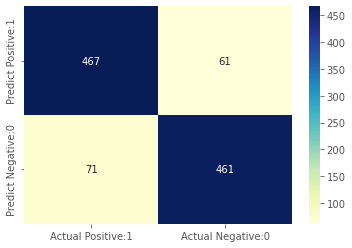

In [62]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) [Actual Positive:1 and Predict Positive:1] = ', cm[0,0])
print('\nTrue Negatives(TN) [Actual Negative:0 and Predict Negative:0] = ', cm[1,1])
print('\nFalse Positives(FP) [Actual Negative:0 but Predict Positive:1] = ', cm[0,1])
print('\nFalse Negatives(FN) [Actual Positive:1 but Predict Negative:0] = ', cm[1,0])

print(f'\nThe confusion matrix shows {cm[0,0]} + {cm[1,1]} = {cm[0,0] + cm[1,1]} correct predictions and {cm[0,1]} + {cm[1,0]} = {cm[0,1] + cm[1,0]} incorrect predictions.')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [63]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
specificity = TN / (TN + FP) * 100
recall = recall_score(y_test, y_pred) * 100
f1score = f1_score(y_test,y_pred) * 100

print("Best RF Accuracy : {0:0.2f}".format(accuracy))
print("Best RF Precision : {0:0.2f}".format(precision))
print("Best RF Specificity : {0:0.2f}".format(specificity))
print("Best RF Recall or Sensitivity : {0:0.2f}".format(recall))
print("Best RF F1_score : {0:0.2f}".format(f1score))



Best RF Accuracy : 87.55
Best RF Precision : 88.31
Best RF Specificity : 88.31
Best RF Recall or Sensitivity : 86.65
Best RF F1_score : 87.48


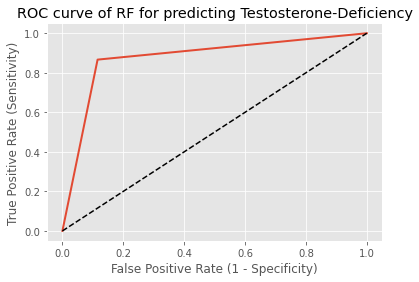

ROC AUC : 0.8755


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 10
plt.title('ROC curve of RF for predicting Testosterone-Deficiency')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [70]:
import pickle
# Save the trained model
with open("best_gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")

Model saved successfully!
